# Processing the dataset
- Loading the dataset and normalizing it

In [11]:
import numpy as np
from keras.datasets import mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [14]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [15]:
from tensorflow.keras.utils import to_categorical

# Preparing Model Structure
- Used a CNN to train model for MNIST Handwritten Digit Recognition
- Intial layers are using convulations and max pooling, followed by flattening and dense nueral netwok
- Activations used: Relu, softmax(for last mayer)
- Loss function: Cross Entropy
- Optimizer: Adam

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [17]:
model = Sequential()

model.add(Input(shape = (28, 28, 1)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,338 (403.66 KB)

 Trainable params: 103,338 (403.66 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

# Training the model
- Training the model and plotting the results to see accuracy change over epochs

In [32]:
data = model.fit(train_images, train_labels, epochs = 10, validation_split = 0.10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9959 - loss: 0.0146 - val_accuracy: 0.9897 - val_loss: 0.0400
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9902 - val_loss: 0.0407
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.9882 - val_loss: 0.0587
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9880 - val_loss: 0.0452
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9867 - val_loss: 0.0580
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9900 - val_loss: 0.0461
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9972 - loss: 0.0078 - val_accuracy: 0.9910 - val_loss: 0.0431
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9985 - loss: 0

In [33]:
import matplotlib.pyplot as plt

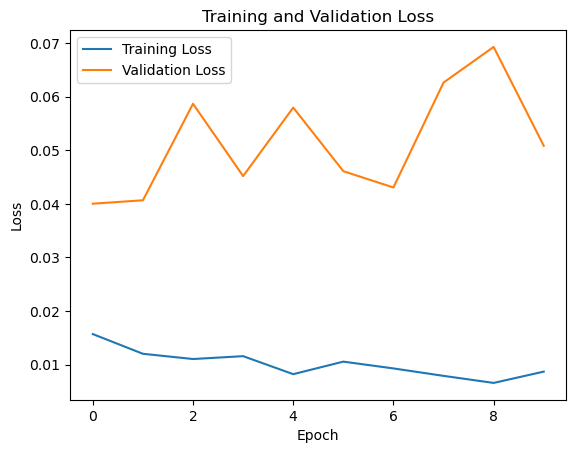

In [34]:
plt.plot(data.history['loss'], label='Training Loss')
plt.plot(data.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

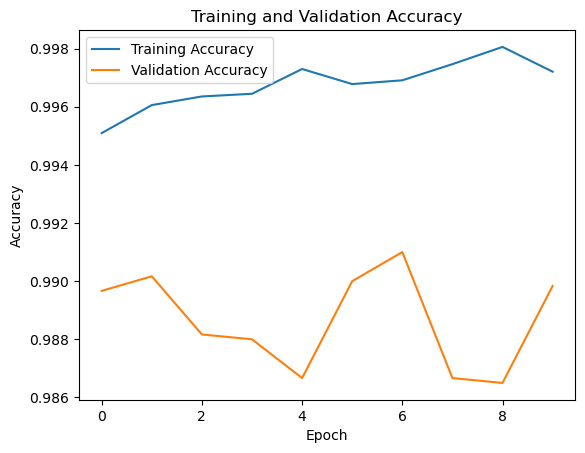

In [35]:
plt.plot(data.history['accuracy'], label='Training Accuracy')
plt.plot(data.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9850 - loss: 0.0805
Test Loss: 0.06043681502342224
Test Accuracy: 0.9886000156402588


In [37]:
# Saving the model
model.save('MNIST_DigitRecognition.h5')

# Testing against custom images
- Verified the results with custom digits

In [38]:
import os
import cv2

In [39]:
for no in range(0,10):
    image_path = '../MNIST_DigitRecognition/' + str(no) + '.jpg'
    custom_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    custom_image_resized = cv2.resize(custom_image, (28, 28)) # Resize to 28x28
    custom_image_normalized = (custom_image_resized / 255).reshape(1, 28, 28, 1)  # Reshape and normalize
    prediction = model.predict(custom_image_normalized)
    predicted_number = np.argmax(prediction)
    print("Predict number: ", predicted_number)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predict number:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predict number:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predict number:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predict number:  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predict number:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predict number:  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predict number:  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predict number:  7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predict number:  8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predict number:  9
